In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("processed_news.csv")
df.head()

,headline,published_at,source,sentiment,stock_ticker,price_before,price_after,price_change (%),final_label
0,Should You Buy Tesla While It's Below $350?,20250301T085000,Motley Fool,NEGATIVE,TSLA,292.980011,292.980011,0.0,Neutral
1,Here's The Mystery Donor Who Donated 10 Tesla ...,20250301T080933,Benzinga,NEGATIVE,TSLA,292.980011,292.980011,0.0,Neutral
2,Tesla Offers Deep Discounts Of Up To $7950 On ...,20250301T062727,Benzinga,POSITIVE,TSLA,292.980011,292.980011,0.0,Neutral
3,"Tesla Owners Stay True To Their Cars, While GM...",20250301T051226,Benzinga,POSITIVE,TSLA,292.980011,292.980011,0.0,Neutral
4,"After FSD Rollout In China, Musk Says Rollout ...",20250301T030038,Benzinga,NEGATIVE,TSLA,292.980011,292.980011,0.0,Neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   headline          2461 non-null   object 
 1   published_at      2461 non-null   object 
 2   source            2461 non-null   object 
 3   sentiment         2461 non-null   object 
 4   stock_ticker      2461 non-null   object 
 5   price_before      2461 non-null   float64
 6   price_after       2461 non-null   float64
 7   price_change (%)  2461 non-null   float64
 8   final_label       2461 non-null   object 
dtypes: float64(3), object(6)
memory usage: 173.2+ KB


<ipython-input-4-1e58bfaca9bd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="final_label", data=df, palette="coolwarm")


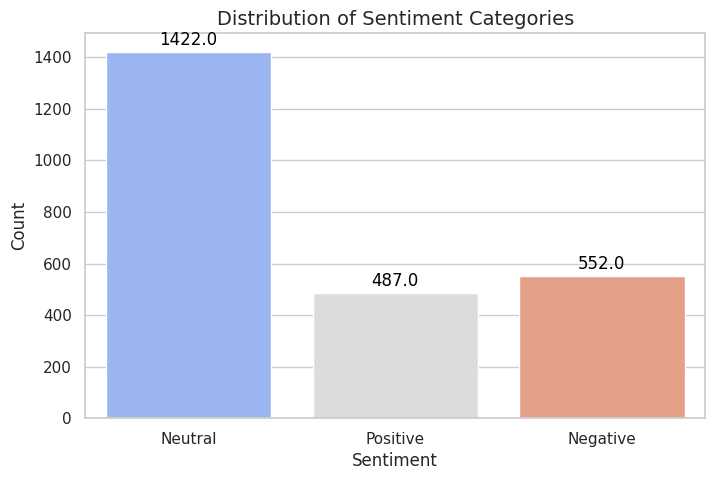

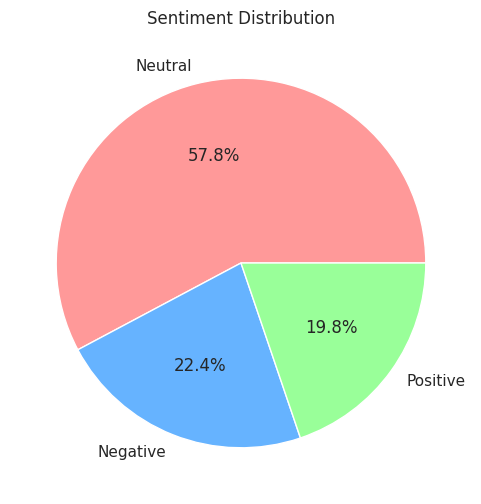

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل البيانات المصنفة
df = pd.read_csv("market_stock_data.csv")

# ضبط نمط Seaborn
sns.set_theme(style="whitegrid")

# رسم مخطط شريطي (Bar Plot)**
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="final_label", data=df, palette="coolwarm")
plt.title("Distribution of Sentiment Categories", fontsize=14)
plt.xlabel("Sentiment", fontsize=12)
plt.ylabel("Count", fontsize=12)

# إضافة الأعداد فوق الأعمدة
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# رسم مخطط دائري (Pie Chart)**
plt.figure(figsize=(6, 6))
df["final_label"].value_counts().plot.pie(autopct='%1.1f%%', colors=["#ff9999", "#66b3ff", "#99ff99"])
plt.title("Sentiment Distribution")
plt.ylabel("")

plt.show()


In [ ]:
sample_pos = 487
sample_neg = 500
sample_neu = 500

df_sampled = pd.concat([
    df[df['final_label'] == "Negative"].sample(n=sample_neg, random_state=42),
    df[df['final_label'] == "Positive"].sample(n=sample_pos, random_state=42),
    df[df['final_label'] == "Neutral"].sample(n=sample_neu, random_state=42)
])

In [ ]:
pip install spacy

# **تنظيف البيانات باستخدام spaCy**

In [ ]:
import spacy
import re
import string
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# تحميل نموذج اللغة الإنجليزية من spaCy
nlp = spacy.load("en_core_web_sm")

def clean_text_spacy(text):
    """
    Text Cleanup with SpaCy
    - Convert text to lowercase
    - Remove numbers
    - Remove punctuation
    - Remove stopwords
    - Remove short words (less than 2 characters)
    """
    text = text.lower()  # تحويل إلى أحرف صغيرة
    text = re.sub(r'\d+', '', text)  # إزالة الأرقام
    text = text.translate(str.maketrans('', '', string.punctuation))  # إزالة علامات الترقيم
    doc = nlp(text)  # تحليل النص باستخدام spaCy
    tokens = [token.lemma_ for token in doc if not token.is_stop and len(token) > 2]  # إزالة الكلمات الشائعة واستخدام Lemmatization
    return " ".join(tokens)


# تنظيف العناوين
df_sampled['clean_headline'] = df['headline'].apply(clean_text_spacy)

# معاينة البيانات بعد التنظيف
print(df_sampled[['headline', 'clean_headline']].head())


                                               headline  \
2431  Why The Honest Company's Stock Swooned in Dece...   
161   SpaceX CEO Elon Musk Pegs Delay In Returning S...   
439   Matthews International Issues Statement Follow...   
159   Billionaire Investor Stanley Druckenmiller Jus...   
1210  Apple Eyes Barclays And Synchrony To Replace G...   

                                         clean_headline  
2431               honest companys stock swoon december  
161   spacex ceo elon musk peg delay return sunita w...  
439   matthews international issue statement follow ...  
159   billionaire investor stanley druckenmiller sel...  
1210  apple eye barclay synchrony replace goldman sa...  


In [ ]:
# إعادة ترتيب البيانات عشوائيًا بعد الدمج
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

# ** Category coding**

In [ ]:
# ترميز final_label إلى أرقام
label_encoder = LabelEncoder()
df_sampled['final_label_encoded'] = label_encoder.fit_transform(df_sampled['final_label'])

# **source encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# ترميز source إلى أرقام
source_encoder = LabelEncoder()
df_sampled['source_encoded'] = source_encoder.fit_transform(df_sampled['source'])

print(df_sampled[['source', 'source_encoded']].head())


            source  source_encoded
0      Motley Fool               9
1      Motley Fool               9
2  Financial Times               6
3         Benzinga               0
4      Motley Fool               9


In [ ]:
unique_sources = df_sampled[['source', 'source_encoded']].drop_duplicates()
print(unique_sources)

                        source  source_encoded
0                  Motley Fool               9
2              Financial Times               6
3                     Benzinga               0
6             Zacks Commentary              11
17                        CNBC               2
19                  Decrypt.co               4
42               GlobeNewswire               7
108   South China Morning Post              10
171                MarketWatch               8
181              Cointelegraph               3
758           Business Insider               1
1395            Economic Times               5


In [ ]:
unique_sources.to_csv("sources_stock.csv", index=False)

# Data Augmentation
# Since you only have 1,000 samples, data augmentation can help improve model performance, especially when dealing with text.

# What will we add?

# 1 - Add synonyms to words using WordNet

# 2 - Randomize word order

# 3 - Add minor spelling errors to simulate real data

# 4 - Remove some unimportant random words

In [ ]:
import random
import nltk
from nltk.corpus import wordnet
import re

nltk.download("wordnet")

def synonym_replacement(sentence, n=1):
    """ استبدال كلمة واحدة أو أكثر بمرادفاتها """
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))

    if len(random_word_list) < 1:
        return sentence

    random.shuffle(random_word_list)
    num_replaced = 0

    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break

    return " ".join(new_words)

def random_deletion(sentence, p=0.1):
    """ حذف بعض الكلمات بشكل عشوائي بنسبة `p` """
    words = sentence.split()
    if len(words) == 1:
        return sentence  # لا يمكن حذف الكلمة الوحيدة

    new_words = [word for word in words if random.uniform(0, 1) > p]
    return " ".join(new_words) if new_words else random.choice(words)

def random_swap(sentence, n=1):
    """ تبديل مواضع بعض الكلمات """
    words = sentence.split()
    if len(words) < 2:
        return sentence  # لا يمكن التبديل إذا كانت هناك كلمة واحدة فقط
    for _ in range(n):
        idx1, idx2 = random.sample(range(len(words)), 2)
        words[idx1], words[idx2] = words[idx2], words[idx1]
    return " ".join(words)

def introduce_typos(sentence, p=0.05):
    """ إضافة أخطاء إملائية عن طريق حذف أو استبدال بعض الحروف """
    words = sentence.split()
    new_words = []
    for word in words:
        if random.uniform(0, 1) < p:
            if len(word) > 1:
                typo_pos = random.randint(0, len(word) - 1)
                typo_type = random.choice(["delete", "replace"])
                if typo_type == "delete":
                    word = word[:typo_pos] + word[typo_pos + 1 :]
                else:
                    word = word[:typo_pos] + random.choice("abcdefghijklmnopqrstuvwxyz") + word[typo_pos + 1 :]
        new_words.append(word)
    return " ".join(new_words)

def augment_text(text):
    """ تطبيق جميع العمليات العشوائية بنسبة معينة """
    if random.uniform(0, 1) < 0.3:
        text = synonym_replacement(text)
    if random.uniform(0, 1) < 0.3:
        text = random_deletion(text)
    if random.uniform(0, 1) < 0.3:
        text = random_swap(text)
    if random.uniform(0, 1) < 0.2:
        text = introduce_typos(text)
    return text

# تجربة `Data Augmentation` على العناوين
df_sampled["augmented_headline"] = df_sampled["clean_headline"].apply(augment_text)

# عرض بعض النتائج
df_sampled[["clean_headline", "augmented_headline"]].head(10)


[nltk_data] Downloading package wordnet to /root/nltk_data...


,clean_headline,augmented_headline
0,lucid motors stock year,stock motors lucid year
1,warren buffett stock hold forever,warren buffett hold stock forever
2,musk altman conflict secure,secure altman conflict musk
3,good get nvidia say analyst predict slowdown c...,good get nvidia say analyst predict slowdown c...
4,soar brilliant stock buy accord wall street,soar brilliant stock wall accord buy street
5,marjorie taylor greene buy artificial intellig...,marjorie taylor greene artificial intelligence...
6,nuscale power stock earning smart buy risky,nuscale power stock buy risky
7,zacks february view equity market,zacks february view market
8,cai post revenue growth,cai post revenue growth
9,apple tesla mag peer expensive hedge fund chal...,apple tesla mag peer expensive hedge fund chal...


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# تعريف الكائن scaler
scaler = MinMaxScaler()

# دمج البيانات الأصلية مع البيانات المحسّنة
df_augmented = df_sampled.copy()
df_augmented["clean_headline"] = df_augmented["augmented_headline"]

# دمج البيانات الأصلية مع المحسنة
df_final = pd.concat([df_sampled, df_augmented]).reset_index(drop=True)

# تحديث قائمة العناوين
clean_headlines = df_final["clean_headline"].tolist()
labels = df_final["final_label_encoded"].values
source_encoded = scaler.fit_transform(df_final["source_encoded"].values.reshape(-1, 1)).flatten()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import DistilBertTokenizer, DistilBertModel
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# تحميل النموذج والمحول (Tokenizer)
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
bert_model = DistilBertModel.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:

# إعداد البيانات
class NewsDataset(Dataset):
    def __init__(self, headlines, sources, labels, tokenizer, max_length=128):
        self.headlines = headlines
        self.sources = sources
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.headlines)

    def __getitem__(self, idx):
        # تحويل النص إلى أرقام باستخدام `DistilRoBERTa Tokenizer`
        encoding = self.tokenizer(
            self.headlines[idx],
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt",
        )

        input_ids = encoding["input_ids"].squeeze(0)  # إزالة البعد الزائد
        attention_mask = encoding["attention_mask"].squeeze(0)

        # تحويل المصدر إلى `Float Tensor`
        source = torch.tensor([self.sources[idx]], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)

        return input_ids, attention_mask, source, label

In [ ]:
# تقسيم البيانات إلى تدريب واختبار
train_texts, test_texts, train_sources, test_sources, train_labels, test_labels = train_test_split(
    clean_headlines, source_encoded, labels, test_size=0.2, stratify=labels, random_state=42
)

# إنشاء كائن `Dataset`
train_dataset = NewsDataset(train_texts, train_sources, train_labels, tokenizer)
test_dataset = NewsDataset(test_texts, test_sources, test_labels, tokenizer)

# إنشاء `DataLoader`
batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# بناء النموذج
class NewsClassifier(nn.Module):
    def __init__(self, bert_model, hidden_size=128, num_classes=3):
        super(NewsClassifier, self).__init__()
        self.bert = bert_model
        self.bert.requires_grad_(True)  # تمكين Fine-Tuning

        self.gru = nn.GRU(input_size=1, hidden_size=hidden_size, batch_first=True)
        self.fc = nn.Linear(768 + hidden_size, num_classes)  # دمج إخراج BERT مع GRU

    def forward(self, input_ids, attention_mask, source):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state[:, 0, :]

        source = source.unsqueeze(1)  # إضافة بعد إضافي لـ GRU
        _, gru_output = self.gru(source)  # أخذ الحالة الأخيرة
        gru_output = gru_output.squeeze(0)  # إزالة البعد الإضافي

        combined = torch.cat((bert_output, gru_output), dim=1)  # دمج المخرجات
        output = self.fc(combined)

        return output

In [ ]:
# إنشاء النموذج
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NewsClassifier(bert_model).to(device)

# اختيار دالة الخسارة (مع وزن متوازن للفئات)
class_weights = torch.tensor([1.0, 1.0, 1.0], dtype=torch.float).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

# اختيار `AdamW` مع `Scheduler`
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.8)

# التدريب
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for input_ids, attention_mask, source, labels in train_loader:
        input_ids, attention_mask, source, labels = input_ids.to(device), attention_mask.to(device), source.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask, source)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    scheduler.step()
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(train_loader)}")



📌 Epoch 1, Loss: 1.090816080970252
📌 Epoch 2, Loss: 0.9742657302209995
📌 Epoch 3, Loss: 0.6594094682059832
📌 Epoch 4, Loss: 0.35679343822818477
📌 Epoch 5, Loss: 0.23310007404961042
📌 Epoch 6, Loss: 0.18419088185733598
📌 Epoch 7, Loss: 0.15435480285160894
📌 Epoch 8, Loss: 0.14668225788280068
📌 Epoch 9, Loss: 0.13006228448560575
📌 Epoch 10, Loss: 0.10950417915084118


In [ ]:
# التقييم
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for input_ids, attention_mask, source, labels in test_loader:
        input_ids, attention_mask, source, labels = input_ids.to(device), attention_mask.to(device), source.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask, source)
        predictions = torch.argmax(outputs, dim=1)

        correct += (predictions == labels).sum().item()
        total += labels.size(0)

print(f" Model accuracy: {correct / total:.4f}")



 Model accuracy: 0.8101


In [ ]:
import torch

# حفظ النموذج بالكامل
torch.save(model.state_dict(), "news_classifier.pth")
print("The model has been saved")


The model has been saved
